In [ ]:
!pip install nltk textblob wordcloud
!pip install malaya

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.1/3.1 MB 28.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 68.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 53.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 293.4/293.4 KB 19.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.7/6.7 MB 56.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 235.9/235.9 KB 22.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 53.1/53.1 KB 5.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 199.2/199.2 KB 21.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 41.2/41.2 KB 4.6 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━

In [ ]:
import malaya
import pandas as pd
import numpy as np
import panel as pn
pn.extension('tabulator')

import re
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from textblob import TextBlob
import nltk
from nltk.probability import FreqDist
nltk.download('vader_lexicon')

import numpy as np
from PIL import Image
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt

/usr/local/lib/python3.9/dist-packages/malaya_boilerplate/frozen_graph.py:35: UserWarning: Cannot import beam_search_ops from Tensorflow Addons, ['malaya.jawi_rumi.deep_model', 'malaya.phoneme.deep_model', 'malaya.rumi_jawi.deep_model', 'malaya.stem.deep_model'] will not available to use, make sure Tensorflow Addons version >= 0.12.0
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/malaya_boilerplate/frozen_graph.py:38: UserWarning: check compatible Tensorflow version with Tensorflow Addons at https://github.com/tensorflow/addons/releases
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/malaya/tokenizer.py:214: FutureWarning: Possible nested set at position 3386
  self.tok = re.compile(r'({})'.format('|'.join(pipeline)))
/usr/local/lib/python3.9/dist-packages/malaya/tokenizer.py:214: FutureWarning: Possible nested set at position 3904
  self.tok = re.compile(r'({})'.format('|'.join(pipeline)))


[nltk_data] Downloading package vader_lexicon to /root/nltk_data...


In [ ]:
##KNOWLEDGE GRAPH

import spacy
import networkx as nx

/usr/local/lib/python3.9/dist-packages/torch/cuda/__init__.py:497: UserWarning: Can't initialize NVML
  warnings.warn("Can't initialize NVML")


In [ ]:
mrt_pjaya_bm = pd.read_csv('/content/MRT_pjaya_BM_1.csv')
# mrt_cyber_bm = pd.read_csv('/content/18-03-23_MRT_cyber_BM_tweets.csv')

In [ ]:
mrt_pjaya_bm

,id,created_at,text
0,1637245247347634176,2023-03-19 00:11:00+00:00,Ini merupakan soalan lazim mengenai #PFR15.\n\...
1,1637244656621854720,2023-03-19 00:08:39+00:00,Ingat nak g jalan naik mrt putrajaya.anyone na...
2,1637235182716739584,2023-03-18 23:31:00+00:00,"So, kalau nak change dari laluan putrajaya ke ..."
3,1637233155580248065,2023-03-18 23:22:57+00:00,Same kalau naik kat mana2 tapi end up kat mrt ...
4,1637232890676383744,2023-03-18 23:21:54+00:00,Baru tahu bila u naik mrt laluan putrajaya the...
...,...,...,...
447,1636310198775349250,2023-03-16 10:15:27+00:00,Perdana Menteri Datuk Seri Anwar Ibrahim mengu...
448,1636309373432791042,2023-03-16 10:12:10+00:00,Perdana Menteri @anwaribrahim umum tambang per...
449,1636308602276438016,2023-03-16 10:09:06+00:00,@TheAvicenna @askrapidkl naik kereta dr nilai ...
450,1636308398882054144,2023-03-16 10:08:18+00:00,Best juga ada MRT Putrajaya line ni..dari Kwas...


In [ ]:
mrt_pjaya_bm.dtypes

id             int64
created_at    object
text          object
dtype: object

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# #Creating new dataframe and new features
# text_only_df = pd.DataFrame(df)
# text_only_df = pd.DataFrame(text_only_df['text'])
# text_only_df.head(5)

,text
0,@askrapidkl @anthonyloke so today is the secon...
1,@askrapidkl They open at 6:30 am. But the othe...
2,@askrapidkl Platform
3,@askrapidkl Now train is stopped at Chan Sow L...
4,@askrapidkl Sri Petaling line Set 18 towards H...


In [ ]:
def preprocess_tweet(sen):
    '''Cleans text data up, leaving only 2 or more char long non-stepwords composed of A-Z & a-z only
    in lowercase'''
    
    sentence = sen.lower()

    # Remove RT
    sentence = re.sub('RT @\w+: '," ", sentence)

    # Remove special characters
    sentence = re.sub("(@[A-Za-z0-9]+)|([^0-9A-Za-z \t])|(\w+:\/\/\S+)"," ", sentence)

    # Single character removal
    sentence = re.sub(r"\s+[a-zA-Z]\s+", ' ', sentence)  # When we remove apostrophe from the word "Mark's", the apostrophe is replaced by an empty space. Hence, we are left with single character "s" that we are removing here.

    # Remove multiple spaces
    sentence = re.sub(r'\s+', ' ', sentence)  # Next, we remove all the single characters and replace it by a space which creates multiple spaces in our text. Finally, we remove the multiple spaces from our text as well.

    return sentence

Cleaning Malay Tweets

In [ ]:
cleaned_tweets = []

for tweet in mrt_pjaya_bm['text']:
  cleaned_tweet = preprocess_tweet(tweet)
  cleaned_tweets.append(cleaned_tweet)

In [ ]:
mrt_pjaya_bm['clean_text'] = pd.DataFrame(cleaned_tweets)
mrt_pjaya_bm.head(5)

,id,created_at,text,clean_text
0,1637245247347634176,2023-03-19 00:11:00+00:00,Ini merupakan soalan lazim mengenai #PFR15.\n\...,ini merupakan soalan lazim mengenai pfr15 nikm...
1,1637244656621854720,2023-03-19 00:08:39+00:00,Ingat nak g jalan naik mrt putrajaya.anyone na...,ingat nak jalan naik mrt putrajaya anyone nak ...
2,1637235182716739584,2023-03-18 23:31:00+00:00,"So, kalau nak change dari laluan putrajaya ke ...",so kalau nak change dari laluan putrajaya ke l...
3,1637233155580248065,2023-03-18 23:22:57+00:00,Same kalau naik kat mana2 tapi end up kat mrt ...,same kalau naik kat mana2 tapi end up kat mrt ...
4,1637232890676383744,2023-03-18 23:21:54+00:00,Baru tahu bila u naik mrt laluan putrajaya the...,baru tahu bila naik mrt laluan putrajaya then ...


Cleaning English Tweets

In [ ]:
cleaned_tweets = []

for tweet in mrt_cyber_eng['text']:
  cleaned_tweet = preprocess_tweet(tweet)
  cleaned_tweets.append(cleaned_tweet)

In [ ]:
mrt_cyber_eng['clean_text'] = pd.DataFrame(cleaned_tweets)
mrt_cyber_eng.head(5)

,id,created_at,text,clean_text
0,1636947628800999430,2023-03-18 04:28:22+00:00,I would take MRT from cyberjaya to HPJ bcs its...,i would take mrt from cyberjaya to hpj bcs its...
1,1636919331354447873,2023-03-18 02:35:55+00:00,The “driving to the station” part is the part ...,the driving to the station part is the part th...
2,1636743917860429825,2023-03-17 14:58:53+00:00,I live near the Cyberjaya City Centre Station ...,i live near the cyberjaya city centre station ...
3,1636660712977338368,2023-03-17 09:28:16+00:00,MRT Cyberjaya is good just because it’s 5 min ...,mrt cyberjaya is good just because it 5 min fr...
4,1636640315787579392,2023-03-17 08:07:13+00:00,@crazycatmakcik Another question: if im from l...,another question if im from lrt line example ...


Sentiment for English Tweets

In [ ]:
#Calculating Negative, Positive, Neutral and Compound values

mrt_pjaya_eng[['polarity', 'subjectivity']] = mrt_pjaya_eng['clean_text'].apply(lambda Text: pd.Series(TextBlob(Text).sentiment))
for index, row in mrt_pjaya_eng['clean_text'].iteritems():
    score = SentimentIntensityAnalyzer().polarity_scores(row)
    neg = score['neg']
    neu = score['neu']
    pos = score['pos']
    comp = score['compound']
    if comp <= -0.05:
        mrt_pjaya_eng.loc[index, 'sentiment'] = "negative"
    elif comp >= 0.05:
        mrt_pjaya_eng.loc[index, 'sentiment'] = "positive"
    else:
        mrt_pjaya_eng.loc[index, 'sentiment'] = "neutral"
    mrt_pjaya_eng.loc[index, 'neg'] = neg
    mrt_pjaya_eng.loc[index, 'neu'] = neu
    mrt_pjaya_eng.loc[index, 'pos'] = pos
    mrt_pjaya_eng.loc[index, 'compound'] = comp

mrt_pjaya_eng

,id,created_at,text,clean_text,polarity,subjectivity,sentiment,neg,neu,pos,compound
0,1637066725291347970,2023-03-18 12:21:37+00:00,MRT Putrajaya is fully run now. I think it is ...,mrt putrajaya is fully run now think it is the...,1.000000,0.300000,positive,0.000,0.792,0.208,0.6369
1,1637050916212973569,2023-03-18 11:18:48+00:00,My second day trying MRT Putrajaya line. I cou...,my second day trying mrt putrajaya line could ...,0.270833,0.545833,positive,0.051,0.813,0.136,0.4939
2,1637019603527438336,2023-03-18 09:14:22+00:00,The fuck lmao it is barely 2 days after openin...,the fuck lmao it is barely 2 days after openin...,-0.037500,0.525000,negative,0.269,0.571,0.159,-0.4019
3,1637019239554125825,2023-03-18 09:12:55+00:00,Trying the free Putrajaya line @anthonyloke #N...,trying the free putrajaya line najibrazak mrt,0.400000,0.800000,positive,0.000,0.645,0.355,0.5106
4,1637000035031453698,2023-03-18 07:56:36+00:00,"@askrapidkl , it'll be helpful 4 the users if ...",it ll be helpful 4 the users if could provide...,0.000000,1.000000,positive,0.000,0.907,0.093,0.4588
...,...,...,...,...,...,...,...,...,...,...,...
339,1634853244664172545,2023-03-12 09:46:02+00:00,"Lately, road users especially those from Putra...",lately road users especially those from putraj...,-0.100000,0.866667,neutral,0.000,1.000,0.000,0.0000
340,1634850914111553536,2023-03-12 09:36:46+00:00,MRT Putrajaya Line Phase Two expected to reduc...,mrt putrajaya line phase two expected to reduc...,-0.100000,0.400000,neutral,0.000,1.000,0.000,0.0000
341,1634842177644929025,2023-03-12 09:02:03+00:00,MRT Putrajaya Line Phase Two expected to reduc...,mrt putrajaya line phase two expected to reduc...,-0.100000,0.400000,neutral,0.000,1.000,0.000,0.0000
342,1634835670421344257,2023-03-12 08:36:12+00:00,@piemadd Putrajaya Line MRT rolling stock made...,putrajaya line mrt rolling stock made by hyun...,0.000000,0.000000,neutral,0.000,1.000,0.000,0.0000


In [ ]:
nan_counts = mrt_pjaya_bm.isna().sum()

print(nan_counts)

id            0
created_at    0
text          0
clean_text    0
dtype: int64


In [ ]:
mrt_pjaya_eng.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344 entries, 0 to 343
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   id            344 non-null    int64  
 1   created_at    344 non-null    object 
 2   text          344 non-null    object 
 3   clean_text    344 non-null    object 
 4   polarity      344 non-null    float64
 5   subjectivity  344 non-null    float64
 6   sentiment     344 non-null    object 
 7   neg           344 non-null    float64
 8   neu           344 non-null    float64
 9   pos           344 non-null    float64
 10  compound      344 non-null    float64
dtypes: float64(6), int64(1), object(4)
memory usage: 29.7+ KB


In [ ]:
#Creating new data frames for all sentiments (positive, negative and neutral)

eng_negative = mrt_pjaya_eng[mrt_pjaya_eng["sentiment"]=="negative"]
eng_positive = mrt_pjaya_eng[mrt_pjaya_eng["sentiment"]=="positive"]
eng_neutral = mrt_pjaya_eng[mrt_pjaya_eng["sentiment"]=="neutral"]

In [ ]:
#Function for count_values_in single columns

def count_values_in_column(data,feature):
    total=data.loc[:,feature].value_counts(dropna=False)
    percentage=round(data.loc[:,feature].value_counts(dropna=False,normalize=True)*100,2)
    return pd.concat([total,percentage],axis=1,keys=['Total','Percentage'])

count_values_in_column(mrt_pjaya_eng,"sentiment")

,Total,Percentage
positive,203,59.01
neutral,119,34.59
negative,22,6.40


Sentiment For Malay Tweets

In [ ]:
malaya.sentiment.label

['negative', 'neutral', 'positive']

In [ ]:
pip install youtokentome

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 86.7/86.7 KB 3.1 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for youtokentome: filename=youtokentome-1.0.6-cp39-cp39-linux_x86_64.whl size=1920723 sha256=816652ae4be5f8de27f32b523f33a87d83237927cd0736a06d741929d9e27110
  Stored in directory: /root/.cache/pip/wheels/89/99/eb/b72f9c470f14438147d8aa1ff91f9f5191b5e5d825c4b0a12c
Successfully built youtokentome


In [ ]:
model = malaya.sentiment.transformer(model = 'tiny-albert')

In [ ]:
cleantweets = mrt_pjaya_bm['clean_text'].values.tolist()

print(cleantweets)

['ini merupakan soalan lazim mengenai pfr15 nikmati perjalanan tanpa had percuma di mrt laluan putrajaya amp bas perantara mrt laluan putrajaya mulai 16 mac sehingga 31 mac 2023 untuk maklumat lanjut sila layari jomnaikmrt rapidkl malaysiamadani ', 'ingat nak jalan naik mrt putrajaya anyone nak join ', 'so kalau nak change dari laluan putrajaya ke lrt kj boleh go to kwasa damansara yang both mrt ada then go to pasar seni which takyah touch pun keluar terus boleh ke lrt kj ', 'same kalau naik kat mana2 tapi end up kat mrt laluan putrajaya free jugak dengan syarat kena bermula berakhir kat mrt laluan putrajaya ', 'baru tahu bila naik mrt laluan putrajaya then turun la kat laluan kajang ke lrt or monorel sekalipun all is free till 31 march ', 'gerabak mrt putrajaya tu kalau pasang lagu kpop sumpah rasa mcm kat seoul dh la tu gerabak dr korea selatan', 'aku pun rasa yang sama dlm kajang line sama packed tapi masih rasa aircond sejuk dlm train mrt putrajaya mcm panas sikit maybe boleh adjus

In [ ]:
sentiment_scores = model.predict_proba(cleantweets)
print(sentiment_scores)

[{'negative': 0.000503027, 'neutral': 0.022715434, 'positive': 0.97678167}, {'negative': 0.0057894075, 'neutral': 0.45043027, 'positive': 0.5437802}, {'negative': 0.00117301, 'neutral': 0.99765855, 'positive': 0.0011682719}, {'negative': 0.9929115, 'neutral': 0.0038573823, 'positive': 0.0032310234}, {'negative': 0.0047674305, 'neutral': 0.99187946, 'positive': 0.0033529312}, {'negative': 0.7336821, 'neutral': 0.02130833, 'positive': 0.24500947}, {'negative': 0.0026458777, 'neutral': 0.009635739, 'positive': 0.9877183}, {'negative': 0.000876185, 'neutral': 0.919569, 'positive': 0.0795548}, {'negative': 0.9950343, 'neutral': 0.00031652593, 'positive': 0.004649584}, {'negative': 0.9979641, 'neutral': 0.0014693546, 'positive': 0.00056654797}, {'negative': 0.9984952, 'neutral': 0.00047507198, 'positive': 0.0010294807}, {'negative': 0.0025127747, 'neutral': 0.99689776, 'positive': 0.0005893957}, {'negative': 0.0016739023, 'neutral': 0.9974184, 'positive': 0.000907551}, {'negative': 0.9992283

In [ ]:
mrt_pjaya_bm['sentiment_scores'] = sentiment_scores

In [ ]:
sentiments = []
negatives = []
positives = []
neutrals = []

for tweet in sentiment_scores:
    sentiment = max(tweet, key=tweet.get)
    sentiments.append(sentiment)
    negatives.append(tweet['negative'])
    positives.append(tweet['positive'])
    neutrals.append(tweet['neutral'])

mrt_pjaya_bm[['sentiment', 'negative', 'positive', 'neutral']] = pd.DataFrame(
    {'sentiment': sentiments, 'negative': negatives, 'positive': positives, 'neutral': neutrals}
)


In [ ]:
mrt_pjaya_bm

,id,created_at,text,clean_text,sentiment_scores,sentiment,negative,positive,neutral
0,1637245247347634176,2023-03-19 00:11:00+00:00,Ini merupakan soalan lazim mengenai #PFR15.\n\...,ini merupakan soalan lazim mengenai pfr15 nikm...,"{'negative': 0.000503027, 'neutral': 0.0227154...",positive,0.000503,0.976782,0.022715
1,1637244656621854720,2023-03-19 00:08:39+00:00,Ingat nak g jalan naik mrt putrajaya.anyone na...,ingat nak jalan naik mrt putrajaya anyone nak ...,"{'negative': 0.0057894075, 'neutral': 0.450430...",positive,0.005789,0.543780,0.450430
2,1637235182716739584,2023-03-18 23:31:00+00:00,"So, kalau nak change dari laluan putrajaya ke ...",so kalau nak change dari laluan putrajaya ke l...,"{'negative': 0.00117301, 'neutral': 0.99765855...",neutral,0.001173,0.001168,0.997659
3,1637233155580248065,2023-03-18 23:22:57+00:00,Same kalau naik kat mana2 tapi end up kat mrt ...,same kalau naik kat mana2 tapi end up kat mrt ...,"{'negative': 0.9929115, 'neutral': 0.003857382...",negative,0.992912,0.003231,0.003857
4,1637232890676383744,2023-03-18 23:21:54+00:00,Baru tahu bila u naik mrt laluan putrajaya the...,baru tahu bila naik mrt laluan putrajaya then ...,"{'negative': 0.0047674305, 'neutral': 0.991879...",neutral,0.004767,0.003353,0.991879
...,...,...,...,...,...,...,...,...,...
447,1636310198775349250,2023-03-16 10:15:27+00:00,Perdana Menteri Datuk Seri Anwar Ibrahim mengu...,perdana menteri datuk seri anwar ibrahim mengu...,"{'negative': 0.59709525, 'neutral': 0.39232028...",negative,0.597095,0.010584,0.392320
448,1636309373432791042,2023-03-16 10:12:10+00:00,Perdana Menteri @anwaribrahim umum tambang per...,perdana menteri umum tambang percuma mrt lalua...,"{'negative': 0.99856955, 'neutral': 0.00063367...",negative,0.998570,0.000797,0.000634
449,1636308602276438016,2023-03-16 10:09:06+00:00,@TheAvicenna @askrapidkl naik kereta dr nilai ...,naik kereta dr nilai ke putrajaya pastu park ...,"{'negative': 0.0014330164, 'neutral': 0.997797...",neutral,0.001433,0.000770,0.997797
450,1636308398882054144,2023-03-16 10:08:18+00:00,Best juga ada MRT Putrajaya line ni..dari Kwas...,best juga ada mrt putrajaya line ni dari kwasa...,"{'negative': 0.0006404584, 'neutral': 0.992434...",neutral,0.000640,0.006925,0.992434


In [ ]:
print(mrt_pjaya_bm.iloc[53])

id                                                1636959999930019840
created_at                                  2023-03-18 05:17:31+00:00
text                Dah try MRT line putrajaya. Senangg nak pergi ...
clean_text          dah try mrt line putrajaya senangg nak pergi a...
sentiment_scores    {'negative': 0.8704881, 'neutral': 0.013948619...
sentiment                                                    negative
negative                                                     0.870488
positive                                                     0.115563
neutral                                                      0.013949
Name: 53, dtype: object


In [ ]:
#Creating new data frames for all sentiments (positive, negative and neutral)

bm_negative = mrt_pjaya_bm[mrt_pjaya_bm["sentiment"]=="negative"]
bm_positive = mrt_pjaya_bm[mrt_pjaya_bm["sentiment"]=="positive"]
bm_neutral = mrt_pjaya_bm[mrt_pjaya_bm["sentiment"]=="neutral"]

In [ ]:
#Function for count_values_in single columns

def count_values_in_column(data,feature):
    total=data.loc[:,feature].value_counts(dropna=False)
    percentage=round(data.loc[:,feature].value_counts(dropna=False,normalize=True)*100,2)
    return pd.concat([total,percentage],axis=1,keys=['Total','Percentage'])

count_values_in_column(mrt_pjaya_bm,"sentiment")

,Total,Percentage
neutral,208,46.02
negative,130,28.76
positive,114,25.22


In [ ]:
#Count_values for sentiment
count_values_in_column(mrt_pjaya_bm,"sentiment")

,Total,Percentage
neutral,208,46.02
negative,130,28.76
positive,114,25.22


In [ ]:
# # create data for Pie Chart
# pichart = count_values_in_column(df,"sentiment")
# # names= pc.index
# # size=pc["Percentage"]

# names= pichart.index
# size=pichart["Percentage"]

# # Create a circle for the center of the plot
# my_circle=plt.Circle( (0,0), 0.7, color='white')
# plt.pie(size, labels=names, colors=['green','blue','red'])
# p=plt.gcf()
# p.gca().add_artist(my_circle)
# plt.show()

In [ ]:
print(pichart.columns)

Index(['index', 'Total', 'Percentage'], dtype='object')


Create wordcloud for English & Malay Tweets

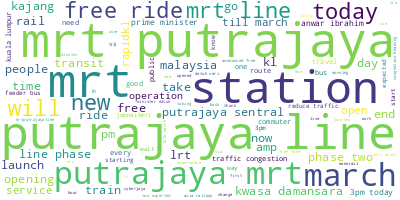

In [ ]:
def create_wordcloud(text):
    # mask = np.array(Image.open("./a1_inputs/cloud.png"))
    stopwords = set(STOPWORDS)
    wc = WordCloud(background_color="white",
                  # mask = mask,
                  max_words=100,
                  stopwords=stopwords,
                  repeat=True)
    wc.generate(str(text))
    wc.to_file("pjaya_mrt_eng.png")
    # print("Word Cloud Saved Successfully")
    path="pjaya_mrt_eng.png"
    display(Image.open(path))
    
word_cloud = create_wordcloud(mrt_pjaya_eng["clean_text"].values)

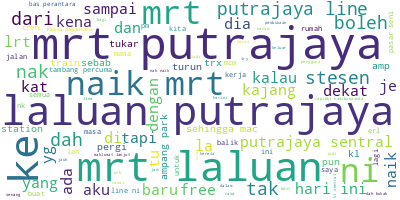

In [ ]:
def create_wordcloud(text):
    # mask = np.array(Image.open("./a1_inputs/cloud.png"))
    stopwords = set(STOPWORDS)
    wc = WordCloud(background_color="white",
                  # mask = mask,
                  max_words=100,
                  stopwords=stopwords,
                  repeat=True)
    wc.generate(str(text))
    wc.to_file("mrt_pjaya_malay.png")
    # print("Word Cloud Saved Successfully")
    path="mrt_pjaya_malay.png"
    display(Image.open(path))
    
word_cloud = create_wordcloud(mrt_pjaya_bm["clean_text"].values)

In [ ]:
# Creating wordcloud for all tweets
# create_wordcloud(df_positive["clean_text"].values)
# create_wordcloud(df_negative["clean_text"].values)
# create_wordcloud(df_neutral["clean_text"].values)



In [ ]:
## CREATE TIME SERIES

# convert created_at column to datetime type
# mrt_cyber_bm['created_at'] = pd.to_datetime(mrt_cyber_bm['created_at'])
mrt_pjaya_bm['created_at'] = pd.to_datetime(mrt_pjaya_bm['created_at'])

In [ ]:
mrt_pjaya_bm.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 452 entries, 0 to 451
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype              
---  ------            --------------  -----              
 0   id                452 non-null    int64              
 1   created_at        452 non-null    datetime64[ns, UTC]
 2   text              452 non-null    object             
 3   clean_text        452 non-null    object             
 4   sentiment_scores  452 non-null    object             
 5   sentiment         452 non-null    object             
 6   negative          452 non-null    float32            
 7   positive          452 non-null    float32            
 8   neutral           452 non-null    float32            
dtypes: datetime64[ns, UTC](1), float32(3), int64(1), object(4)
memory usage: 26.6+ KB


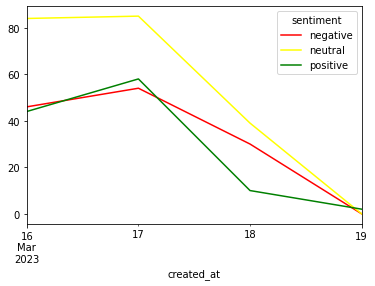

In [ ]:
##ENGLISH TWEETS

# group the data by day and sentiment
## key='created-at' will make the created at as the key instead of index. if index, created_at will not be in df anymore.

grouped = mrt_pjaya_bm.groupby([pd.Grouper(key='created_at', freq='D'), 'sentiment']).size().reset_index()
grouped = grouped.rename(columns={0: 'count'})

# pivot the data so that each sentiment has its own column
pivot = grouped.pivot(index='created_at', columns='sentiment', values='count')

# fill any missing values with 0
pivot = pivot.fillna(0)

# plot the data

line_chart = pivot.plot(kind='line', color={"positive": "green", "negative": "red", "neutral": "yellow"})
plt.show()
   

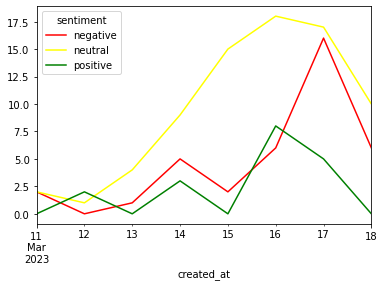

In [ ]:
## MALAY TWEETS

# group the data by day and sentiment
## key='created-at' will make the created at as the key instead of index. if index, created_at will not be in df anymore.

grouped = mrt_cyber_bm.groupby([pd.Grouper(key='created_at', freq='D'), 'sentiment']).size().reset_index()
grouped = grouped.rename(columns={0: 'count'})

# pivot the data so that each sentiment has its own column
pivot = grouped.pivot(index='created_at', columns='sentiment', values='count')

# fill any missing values with 0
pivot = pivot.fillna(0)

# plot the data

line_chart = pivot.plot(kind='line', color={"positive": "green", "negative": "red", "neutral": "yellow"})
plt.show()

In [ ]:
from collections import Counter

ENGLISH WORD FREQUENCY FUNCTION



In [ ]:


from nltk.corpus import stopwords

# download the stopwords
nltk.download('stopwords')

my_stopwords = {"hi", "pls", "please", "thank", "thanks", "thank u", "thank you", "like", "mrt", "putrajaya", "line"}


# get the list of stopwords
stop_words = set(stopwords.words('english'))
stop_words = stop_words.union(my_stopwords)
# define a function to remove stopwords
def remove_stopwords(text):
    words = [word for word in text.split() if word.lower() not in stop_words]
    return " ".join(words)


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [ ]:
# apply the function to the clean_text column
mrt_pjaya_eng['clean_text'] = mrt_pjaya_eng['clean_text'].apply(remove_stopwords)

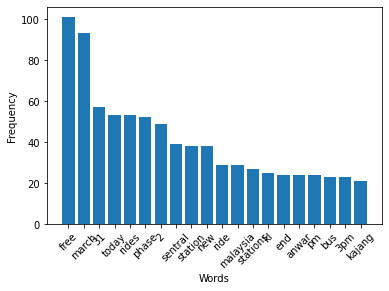

In [ ]:
# create a list of words from the clean_text column
words = [word for row in mrt_pjaya_eng['clean_text'] for word in row.split()]

# calculate the word frequency
fdist = FreqDist(words)

# get the top 20 most common words
top_words = fdist.most_common(20)

# extract the words and their frequency
words = [word[0] for word in top_words]
frequency = [word[1] for word in top_words]

# plot the bar chart
plt.bar(words, frequency)
plt.xlabel("Words")
plt.ylabel("Frequency")
plt.xticks(rotation=45)
plt.show()

In [ ]:
# create a list of words from the clean_text column
words = [word for row in mrt_pjaya_eng['clean_text'] for word in row.split()]

# calculate the word frequency
fdist = FreqDist(words)

# get the top 50 most common words
top_words = fdist.most_common(30)

# create a DataFrame from the words and their frequency
pjaya_mrt_eng_freq = pd.DataFrame(top_words, columns=['Word', 'Frequency'])

# display the frequency table
print(pjaya_mrt_eng_freq)


         Word  Frequency
0        free        101
1       march         93
2          31         57
3       today         53
4       rides         53
5       phase         52
6           2         49
7     sentral         39
8     station         38
9         new         38
10       ride         29
11   malaysia         29
12   stations         27
13         kl         25
14        end         24
15      anwar         24
16         pm         24
17        bus         23
18        3pm         23
19     kajang         21
20  damansara         21
21         16         21
22       till         20
23      kwasa         20
24   expected         20
25        amp         19
26        two         19
27        day         18
28      train         18
29       2023         18


MALAY WORD FREQUENCY FUNCTION

In [ ]:
from nltk.corpus import stopwords

# download the stopwords
nltk.download('stopwords')

my_stopwords = {"hi", "pls", "please", "thank", "thanks", "thank u", "thank you", "like", "to", "tu", "ni", "mrt", "putrajaya", "laluan", 
"line", "nak", "dah", "stesen", "la", "je", "kat", "so", "yg", "lrt"}


# get the list of stopwords
stop_words = set(stopwords.words('indonesian'))
stop_words = stop_words.union(my_stopwords)
# define a function to remove stopwords
def remove_stopwords(text):
    words = [word for word in text.split() if word.lower() not in stop_words]
    return " ".join(words)

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [ ]:
# apply the function to the clean_text column
mrt_pjaya_bm['clean_text'] = mrt_pjaya_bm['clean_text'].apply(remove_stopwords)

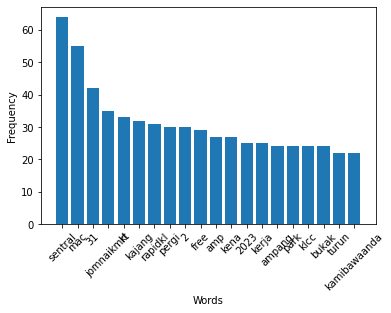

In [ ]:
# create a list of words from the clean_text column
words = [word for row in mrt_pjaya_bm['clean_text'] for word in row.split()]

# calculate the word frequency
fdist = FreqDist(words)

# get the top 20 most common words
top_words = fdist.most_common(20)

# extract the words and their frequency
words = [word[0] for word in top_words]
frequency = [word[1] for word in top_words]

# plot the bar chart
plt.bar(words, frequency)
plt.xlabel("Words")
plt.ylabel("Frequency")
plt.xticks(rotation=45)
plt.show()

In [ ]:
# create a list of words from the clean_text column
words = [word for row in mrt_pjaya_bm['clean_text'] for word in row.split()]

# calculate the word frequency
fdist = FreqDist(words)

# get the top 50 most common words
top_words = fdist.most_common(30)

# create a DataFrame from the words and their frequency
mrt_pjaya_bm_freq = pd.DataFrame(top_words, columns=['Word', 'Frequency'])

# display the frequency table
print(mrt_pjaya_bm_freq)


            Word  Frequency
0        sentral         64
1            mac         55
2             31         42
3     jomnaikmrt         35
4             kl         33
5         kajang         32
6        rapidkl         31
7          pergi         30
8              2         30
9           free         29
10           amp         27
11          kena         27
12          2023         25
13         kerja         25
14        ampang         24
15          park         24
16          klcc         24
17         bukak         24
18         turun         22
19  kamibawaanda         22
20           trx         22
21       tambang         22
22           bas         21
23         train         21
24         tukar         21
25           try         21
26    perjalanan         20
27         kwasa         20
28         ramai         20
29             1         20


KNOWLEDGE GRAPH ENGLISH & MALAY

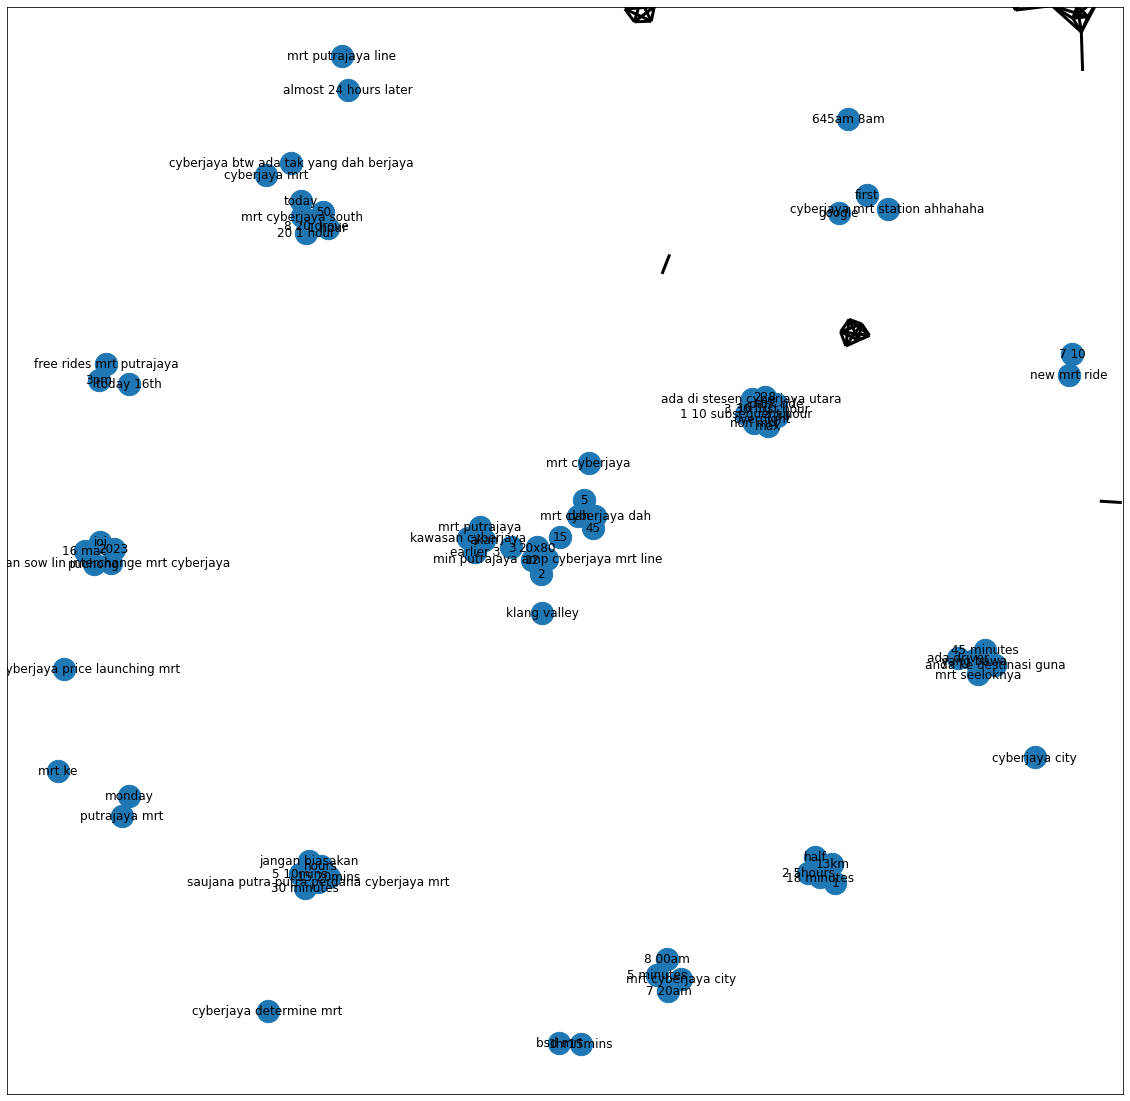

In [ ]:
## ENGLISH

# Load the language model for NER
nlp = spacy.load('en_core_web_sm')

# Create a new graph
G = nx.Graph()

# Loop through the tweets and extract entities
for tweet in mrt_cyber_eng['clean_text']:
    doc = nlp(tweet)
    entities = [ent.text for ent in doc.ents]
    
    # Add nodes to the graph
    for entity in entities:
        G.add_node(entity)
    
    # Add edges to the graph
    for i in range(len(entities)):
        for j in range(i+1, len(entities)):
            G.add_edge(entities[i], entities[j])
            
# # Visualize the graph
# # Circular layout
# nx.draw_networkx(G, node_size=1000, layout=nx.circular_layout)

# # Spring layout
# nx.draw_networkx(G, node_size=1000, layout=nx.spring_layout)

# # Spectral layout
# nx.draw_networkx(G, node_size=1000, layout=nx.spectral_layout)



plt.figure(figsize=(20, 20))
nx.draw_networkx(G, node_size=500, width=3)
plt.show()

In [ ]:
mrt_pjaya_bm.to_csv('mrt_pjaya_bm_sentiment.csv', index=False)
# mrt_pjaya_eng.to_csv('mrt_pjaya_eng_sentiment.csv', index=False)
mrt_pjaya_bm_freq.to_csv('wordfrequency_mrt_pjaya_bm.csv', index=False)
# pjaya_mrt_eng_freq.to_csv('wordfrequency_mrt_pjaya_eng.csv', index=False)